In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from google.colab import drive
drive.mount('/content/gdrive') #import data and important packages

Mounted at /content/gdrive


In [ ]:
#take 12 data train/test sets from google drive and put them in as variables
Tag1_1_data = pd.read_csv("/content/gdrive/MyDrive/Tag1_1.csv")
Tag1_2_data = pd.read_csv("/content/gdrive/MyDrive/Tag1_2.csv")
Tag1_3_data = pd.read_csv("/content/gdrive/MyDrive/Tag1_3.csv")
Tag2_1_data = pd.read_csv("/content/gdrive/MyDrive/Tag2_1.csv")
Tag2_2_data = pd.read_csv("/content/gdrive/MyDrive/Tag2_2.csv")
Tag2_3_data = pd.read_csv("/content/gdrive/MyDrive/Tag2_3.csv")
Tag3_1_data = pd.read_csv("/content/gdrive/MyDrive/Tag3_1.csv")
Tag3_2_data = pd.read_csv("/content/gdrive/MyDrive/Tag3_2.csv")
Tag3_3_data = pd.read_csv("/content/gdrive/MyDrive/Tag3_3.csv")
Tag4_1_data = pd.read_csv("/content/gdrive/MyDrive/Tag4_1.csv")
Tag4_2_data = pd.read_csv("/content/gdrive/MyDrive/Tag4_2.csv")
Tag4_3_data = pd.read_csv("/content/gdrive/MyDrive/Tag4_3.csv")


We will use Tag1_1_data to start all of the code. Once a good model is created with summary statistics and math that will be used to compute final error correction. The other data points will be used (follow suit) and tested.

In [ ]:
Tag1_1_data.head()

,X_prediction,Y_prediction,Z_prediction,Weight1,Weight2,Weight3,Weight4,True_X,True_Y,True_Z,Error_X,Error_Y,Error_Z,Total_error
0,9.189189,39.972973,68.918919,0.346154,0.346154,0.153846,0.153846,64,23.034120,85,-54.810811,16.938853,-16.081081,59.579786
1,81.836571,10.087138,29.342462,0.461504,0.244830,0.154867,0.138798,64,23.058232,85,17.836571,-12.971094,-55.657538,59.867805
2,110.737650,9.902395,38.078195,0.452107,0.318730,0.115788,0.113375,64,23.130340,85,46.737650,-13.227945,-46.921805,67.535489
3,42.278490,9.804450,80.310182,0.361579,0.259661,0.209005,0.169755,64,23.213291,85,-21.721510,-13.408841,-4.689818,25.954102
4,22.574239,19.472426,26.406040,0.468078,0.244504,0.149622,0.137796,64,23.309829,85,-41.425761,-3.837403,-58.593960,71.861474


In [ ]:
Tag1_1_data.dtypes

,0
X_prediction,float64
Y_prediction,float64
Z_prediction,float64
Weight1,float64
Weight2,float64
Weight3,float64
Weight4,float64
True_X,int64
True_Y,float64
True_Z,int64


In [ ]:
#rename column heads to know what data we are dealing with
Tag1_1 = pd.DataFrame(Tag1_1_data, columns=['X_prediction', 'Y_prediction', 'Z_prediction','Weight1','Weight2','Weight3','Weight4',
                                            "Error_Y"])
Tag1_1.head()

,X_prediction,Y_prediction,Z_prediction,Weight1,Weight2,Weight3,Weight4,Error_Y
0,9.189189,39.972973,68.918919,0.346154,0.346154,0.153846,0.153846,16.938853
1,81.836571,10.087138,29.342462,0.461504,0.244830,0.154867,0.138798,-12.971094
2,110.737650,9.902395,38.078195,0.452107,0.318730,0.115788,0.113375,-13.227945
3,42.278490,9.804450,80.310182,0.361579,0.259661,0.209005,0.169755,-13.408841
4,22.574239,19.472426,26.406040,0.468078,0.244504,0.149622,0.137796,-3.837403


In [ ]:
#do the same for all the other tags
Tag1_2 = pd.DataFrame(Tag1_2_data, columns=['X_prediction', 'Y_prediction', 'Z_prediction','Weight1','Weight2','Weight3','Weight4',
                                            "Error_Y"])
Tag1_3 = pd.DataFrame(Tag1_3_data, columns=['X_prediction', 'Y_prediction', 'Z_prediction','Weight1','Weight2','Weight3','Weight4',
                                            "Error_Y"])
Tag2_1 = pd.DataFrame(Tag2_1_data, columns=['X_prediction', 'Y_prediction', 'Z_prediction','Weight1','Weight2','Weight3','Weight4',
                                            "Error_Y"])
Tag2_2 = pd.DataFrame(Tag2_2_data, columns=['X_prediction', 'Y_prediction', 'Z_prediction','Weight1','Weight2','Weight3','Weight4',
                                            "Error_Y"])
Tag2_3 = pd.DataFrame(Tag2_3_data, columns=['X_prediction', 'Y_prediction', 'Z_prediction','Weight1','Weight2','Weight3','Weight4',
                                            "Error_Y"])
Tag3_1 = pd.DataFrame(Tag3_1_data, columns=['X_prediction', 'Y_prediction', 'Z_prediction','Weight1','Weight2','Weight3','Weight4',
                                            "Error_Y"])
Tag3_2 = pd.DataFrame(Tag3_2_data, columns=['X_prediction', 'Y_prediction', 'Z_prediction','Weight1','Weight2','Weight3','Weight4',
                                            "Error_Y"])
Tag3_3 = pd.DataFrame(Tag3_3_data, columns=['X_prediction', 'Y_prediction', 'Z_prediction','Weight1','Weight2','Weight3','Weight4',
                                            "Error_Y"])
Tag4_1 = pd.DataFrame(Tag4_1_data, columns=['X_prediction', 'Y_prediction', 'Z_prediction','Weight1','Weight2','Weight3','Weight4',
                                            "Error_Y"])
Tag4_2 = pd.DataFrame(Tag4_2_data, columns=['X_prediction', 'Y_prediction', 'Z_prediction','Weight1','Weight2','Weight3','Weight4',
                                            "Error_Y"])
Tag4_3 = pd.DataFrame(Tag4_3_data, columns=['X_prediction', 'Y_prediction', 'Z_prediction','Weight1','Weight2','Weight3','Weight4',
                                            "Error_Y"])

In [ ]:
#seperate X and y values
X = Tag1_1.iloc[:, :-1].values
y = Tag1_1.iloc[:,-1].values
X
X1 = Tag2_1.iloc[:, :-1].values
y1 = Tag2_1.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train

array([-2.40117663e+01,  1.54989526e+01,  2.24853110e+00, -6.89442625e+00,
       -7.37776069e+00,  1.15453363e+01, -2.52856171e+00, -8.47644257e+00,
        2.52473622e+00,  2.06895614e+01, -2.59378956e+01, -3.41124576e+01,
        3.52118152e+01,  1.27209852e+01, -5.49542039e-01, -1.58855616e+01,
       -2.96519155e+01,  1.32618052e+01, -6.46326634e+00,  7.02452018e+00,
        2.05372586e+01, -2.17036645e+01,  1.84288093e+01, -2.23153487e+00,
       -9.38861025e+00, -1.69587137e+01, -1.28815026e+01, -1.30051500e+01,
       -2.22141429e+01, -1.32036351e+01,  2.12219414e+00,  2.61465404e+00,
       -9.16421259e+00, -2.31239429e+01, -8.21066803e+00, -1.47240159e+01,
       -8.08254283e+00, -5.48387137e+00,  2.27591462e+01,  1.24462287e+01,
        1.60197992e+01,  3.84204979e+01, -1.54065775e+01, -2.32529729e+01,
       -1.65465233e+01, -9.32768456e+00, -1.94706331e+01, -1.32788421e+01,
       -1.17139738e+01, -9.96558687e+00, -1.69647277e+01, -1.12082536e+01,
       -1.69021708e+01,  

In [ ]:
#normalize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Define the neural network model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(256, input_dim=7, activation='relu'))   # Input layer with 7 inputs
model.add(Dense(256, activation='relu'))                # Hidden layer
model.add(Dense(1, activation='linear'))               # Output layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

In [ ]:
# Train the model
history1 = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 44.0953 - mae: 5.3169 - val_loss: 47.6787 - val_mae: 5.6424
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 48.1489 - mae: 5.7562 - val_loss: 51.0201 - val_mae: 5.7978
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 43.1550 - mae: 5.3227 - val_loss: 48.5749 - val_mae: 5.6922
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 44.2072 - mae: 5.3560 - val_loss: 52.5699 - val_mae: 5.8633
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 47.1158 - mae: 5.6072 - val_loss: 48.7510 - val_mae: 5.7112
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 47.4511 - mae: 5.6575 - val_loss: 51.0830 - val_mae: 5.7969
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 44.3412 - mae: 5.4458 - val_loss: 48.4389 - val_mae: 5.6739
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 43.2839 - mae: 5.4637 - val_loss: 50.8491 - val_mae: 5.7850
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/st

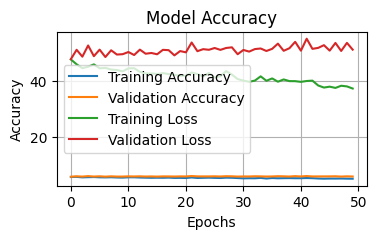

In [ ]:
plt.figure(figsize=(4, 2))
plt.plot(history1.history['mae'], label='Training Accuracy')
plt.plot(history1.history['val_mae'], label='Validation Accuracy')
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Evaluate model and make predictions on error
loss, mae = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Loss: {loss:.4f}')
print(f'Test MAE: {mae:.4f}')

# Make predictions (example)
predictions = model.predict(X_test)
print(f'Sample predictions: {predictions[:5].flatten()}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 59.3708 - mae: 6.2929 
Test Loss: 57.9972
Test MAE: 6.1109
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Sample predictions: [-12.193704  -12.280551   -6.6160793 -18.938644   -8.74681  ]


In [ ]:
#Test second tags predictions without making a new model
loss, mae = model.evaluate(X1, y1, verbose=1)
print(f'Test Loss: {loss:.4f}')
print(f'Test MAE: {mae:.4f}')

# Make predictions (example)
predictions = model.predict(X1)
print(f'Sample predictions: {predictions[:5].flatten()}')

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 741489.8125 - mae: 753.8862  
Test Loss: 706536.6250
Test MAE: 733.8578
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Sample predictions: [1004.0803  1172.03    1327.695    686.34094 1055.2749 ]


Forgot I need to scale the second set of values I'm testing as well. Do that next.

In [ ]:
X1 = scaler.fit_transform(X1)

In [ ]:
#Test second tags predictions without making a new model
loss, mae = model.evaluate(X1, y1, verbose=1)
print(f'Test Loss: {loss:.4f}')
print(f'Test MAE: {mae:.4f}')

# Make predictions (example)
predictions = model.predict(X1)
print(f'Sample predictions: {predictions[:5].flatten()}')

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 151.2786 - mae: 9.7108
Test Loss: 131.0354
Test MAE: 8.8626
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Sample predictions: [  9.340567   -5.0245733   6.006158  -13.589047   22.207924 ]


A lot better, but MAE is a lot higher error that specific tag. Try and make a model specifically for this tag to see how much it improves.

In [ ]:
#train model for tag2_1 to see how much better the tags own model performs compared to its adjacent tag.
X1 = Tag2_1.iloc[:, :-1].values
y1 = Tag2_1.iloc[:,-1].values

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)
#y_train

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train1)
X_test1 = scaler.transform(X_test1)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(256, input_dim=7, activation='relu'))   # Input layer with 7 inputs
model.add(Dense(256, activation='relu'))                # Hidden layer
model.add(Dense(1, activation='linear'))               # Output layer

from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

history2 = model.fit(X_train1, y_train1, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 652.6982 - mae: 20.4344 - val_loss: 478.3962 - val_mae: 18.1616
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 545.2424 - mae: 18.6726 - val_loss: 387.6816 - val_mae: 16.1544
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 389.6838 - mae: 15.7278 - val_loss: 262.8658 - val_mae: 12.7628
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 281.0777 - mae: 13.0985 - val_loss: 144.9478 - val_mae: 8.9194
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 152.6610 - mae: 9.2412 - val_loss: 80.2887 - val_mae: 6.5596
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 83.1825 - mae: 7.0284 - val_loss: 56.9026 - val_mae: 5.7167
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 63.5339 - mae: 6.4691 - val_loss: 47.0446 - val_mae: 5.3863
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 47.6995 - mae: 5.6254 - val_loss: 43.4139 - val_mae: 5.3069
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 

In [ ]:
#train model for tag2_1 to see how much better the tags own model performs compared to its adjacent tag.
X1 = Tag3_1.iloc[:, :-1].values
y1 = Tag3_1.iloc[:,-1].values

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)
#y_train

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train1)
X_test1 = scaler.transform(X_test1)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(256, input_dim=7, activation='relu'))   # Input layer with 7 inputs
model.add(Dense(256, activation='relu'))                # Hidden layer
model.add(Dense(1, activation='linear'))               # Output layer

from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

history7 = model.fit(X_train1, y_train1, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 565.6013 - mae: 18.3280 - val_loss: 293.8365 - val_mae: 13.8002
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 464.3276 - mae: 16.2242 - val_loss: 231.1269 - val_mae: 12.1057
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 340.4641 - mae: 13.7698 - val_loss: 156.9282 - val_mae: 9.7192
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 179.1258 - mae: 10.2826 - val_loss: 115.8297 - val_mae: 8.4383
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 121.6536 - mae: 8.7190 - val_loss: 110.4844 - val_mae: 8.3122
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 85.8159 - mae: 7.2692 - val_loss: 79.1496 - val_mae: 7.3907
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 74.0470 - mae: 7.0485 - val_loss: 60.5323 - val_mae: 6.6875
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 63.2481 - mae: 6.5139 - val_loss: 51.4356 - val_mae: 6.1859
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step

In [ ]:
#Test second tags predictions without making a new model
loss, mae = model.evaluate(X1, y1, verbose=1)
print(f'Test Loss: {loss:.4f}')
print(f'Test MAE: {mae:.4f}')

# Make predictions (example)
predictions = model.predict(X1)
print(f'Sample predictions: {predictions[:5].flatten()}')

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 968149.9375 - mae: 862.4758  
Test Loss: 1042445.2500
Test MAE: 892.1968
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Sample predictions: [1065.5398  1266.9346   847.3993   828.7264   650.33527]


In [ ]:
#train model for tag2_1 to see how much better the tags own model performs compared to its adjacent tag.
X1 = Tag4_1.iloc[:, :-1].values
y1 = Tag4_1.iloc[:,-1].values

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)
#y_train

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train1)
X_test1 = scaler.transform(X_test1)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(256, input_dim=7, activation='relu'))   # Input layer with 7 inputs
model.add(Dense(256, activation='relu'))                # Hidden layer
model.add(Dense(1, activation='linear'))               # Output layer

from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

history8 = model.fit(X_train1, y_train1, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 382.0823 - mae: 14.6688 - val_loss: 341.7176 - val_mae: 13.4200
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 350.7418 - mae: 14.0874 - val_loss: 258.8811 - val_mae: 11.4377
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 225.8656 - mae: 11.3292 - val_loss: 156.7270 - val_mae: 8.6388
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 129.3549 - mae: 8.9777 - val_loss: 95.5864 - val_mae: 6.8205
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 97.3979 - mae: 7.5444 - val_loss: 78.4314 - val_mae: 6.8071
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 87.3770 - mae: 7.4404 - val_loss: 67.6699 - val_mae: 6.3214
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 68.7161 - mae: 6.5858 - val_loss: 59.6655 - val_mae: 6.1560
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 68.0284 - mae: 6.8518 - val_loss: 55.2611 - val_mae: 5.9866
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/st

In [ ]:
#Test second tags predictions without making a new model
loss, mae = model.evaluate(X1, y1, verbose=1)
print(f'Test Loss: {loss:.4f}')
print(f'Test MAE: {mae:.4f}')

# Make predictions (example)
predictions = model.predict(X1)
print(f'Sample predictions: {predictions[:5].flatten()}')

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 392446.6875 - mae: 510.7778 
Test Loss: 384899.2500
Test MAE: 494.3659
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Sample predictions: [ 489.1462  1067.655    325.84985  442.8647   370.61212]


In [ ]:
#Evaluate model and make predictions on error
loss, mae = model.evaluate(X_test1, y_test1, verbose=1)
print(f'Test Loss: {loss:.4f}')
print(f'Test MAE: {mae:.4f}')

# Make predictions (example)
predictions = model.predict(X_test1)
print(f'Sample predictions: {predictions[:5].flatten()}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 62.1387 - mae: 6.1023 
Test Loss: 59.8896
Test MAE: 5.9960
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Sample predictions: [-10.656521 -20.82755   17.647396  18.32585  -26.833834]


In [ ]:
#Make model for second set of tests

X2 = Tag1_2.iloc[:, :-1].values
y2 = Tag1_2.iloc[:,-1].values

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)
#y_train

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.transform(X_test2)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(256, input_dim=7, activation='relu'))   # Input layer with 7 inputs
model.add(Dense(256, activation='relu'))                # Hidden layer
model.add(Dense(1, activation='linear'))               # Output layer

from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

history3 = model.fit(X_train2, y_train2, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 311.9980 - mae: 14.5396 - val_loss: 224.6506 - val_mae: 11.8810
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 254.8998 - mae: 12.9315 - val_loss: 177.4507 - val_mae: 10.5269
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 207.6758 - mae: 11.3834 - val_loss: 119.3541 - val_mae: 8.5529
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 118.2673 - mae: 8.4070 - val_loss: 65.7849 - val_mae: 6.3867
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 61.9559 - mae: 6.3559 - val_loss: 46.1551 - val_mae: 5.2685
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 51.4574 - mae: 5.6607 - val_loss: 40.9884 - val_mae: 4.7476
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 41.2445 - mae: 4.9365 - val_loss: 35.3899 - val_mae: 4.5824
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 36.4699 - mae: 4.6846 - val_loss: 34.4664 - val_mae: 4.6999
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - lo

In [ ]:
#Evaluate model and make predictions on error
loss, mae = model.evaluate(X_test2, y_test2, verbose=1)
print(f'Test Loss: {loss:.4f}')
print(f'Test MAE: {mae:.4f}')

# Make predictions (example)
predictions = model.predict(X_test2)
print(f'Sample predictions: {predictions[:5].flatten()}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 29.0984 - mae: 4.3118 
Test Loss: 28.0162
Test MAE: 4.2052
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Sample predictions: [  2.7551284 -14.28491    47.03098     4.62846    13.330834 ]


In [ ]:
#Make model for second set of tests

X3 = Tag1_3.iloc[:, :-1].values
y3 = Tag1_3.iloc[:,-1].values

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)
#y_train

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train3 = scaler.fit_transform(X_train3)
X_test3 = scaler.transform(X_test3)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(256, input_dim=7, activation='relu'))   # Input layer with 7 inputs
model.add(Dense(256, activation='relu'))                # Hidden layer
model.add(Dense(1, activation='linear'))               # Output layer

from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

history4 = model.fit(X_train3, y_train3, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 757.9211 - mae: 22.6481 - val_loss: 715.3354 - val_mae: 21.6003
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 556.2844 - mae: 19.1077 - val_loss: 549.2737 - val_mae: 18.9266
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 450.3781 - mae: 17.4114 - val_loss: 320.1454 - val_mae: 14.3163
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 275.0662 - mae: 13.2665 - val_loss: 120.7408 - val_mae: 8.8050
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 101.1952 - mae: 8.0220 - val_loss: 62.0433 - val_mae: 5.8616
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 49.7181 - mae: 5.6685 - val_loss: 35.9395 - val_mae: 4.8085
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 36.4411 - mae: 5.0243 - val_loss: 36.0895 - val_mae: 4.9432
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 33.9543 - mae: 4.7103 - val_loss: 35.3316 - val_mae: 4.5809
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms

In [ ]:
loss, mae = model.evaluate(X_test3, y_test3, verbose=1)
print(f'Test Loss: {loss:.4f}')
print(f'Test MAE: {mae:.4f}')

# Make predictions (example)
predictions = model.predict(X_test3)
print(f'Sample predictions: {predictions[:5].flatten()}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 21.5493 - mae: 3.4139 
Test Loss: 20.7971
Test MAE: 3.4025


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Sample predictions: [ -4.797918  44.895416  39.562157  54.32469  -14.17113 ]


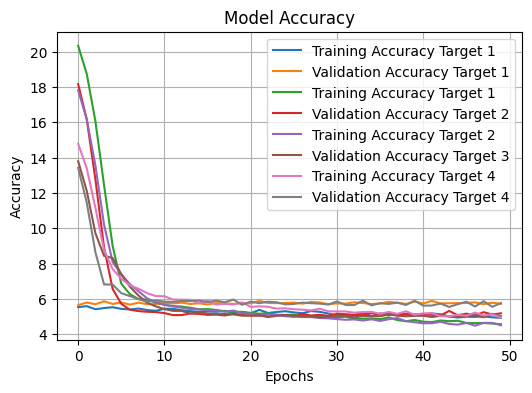

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(history1.history['mae'], label='Training Accuracy Target 1')
plt.plot(history1.history['val_mae'], label='Validation Accuracy Target 1')
plt.plot(history2.history['mae'], label='Training Accuracy Target 1')
plt.plot(history2.history['val_mae'], label='Validation Accuracy Target 2')
plt.plot(history7.history['mae'], label='Training Accuracy Target 2')
plt.plot(history7.history['val_mae'], label='Validation Accuracy Target 3')
plt.plot(history8.history['mae'], label='Training Accuracy Target 4')
plt.plot(history8.history['val_mae'], label='Validation Accuracy Target 4')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#train model for tag2_1 to see how much better the tags own model performs compared to its adjacent tag.
X1 = Tag1_2.iloc[:, :-1].values
y1 = Tag1_2.iloc[:,-1].values

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)
#y_train

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train1)
X_test1 = scaler.transform(X_test1)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(256, input_dim=7, activation='relu'))   # Input layer with 7 inputs
model.add(Dense(256, activation='relu'))                # Hidden layer
model.add(Dense(1, activation='linear'))               # Output layer

from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

history5 = model.fit(X_train1, y_train1, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 317.7525 - mae: 14.6871 - val_loss: 224.2746 - val_mae: 11.9469
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 251.9402 - mae: 12.9423 - val_loss: 172.9693 - val_mae: 10.5531
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 167.1653 - mae: 10.3412 - val_loss: 106.3633 - val_mae: 8.2617
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 111.4016 - mae: 8.2350 - val_loss: 55.9263 - val_mae: 6.0112
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 56.7604 - mae: 6.1410 - val_loss: 43.3495 - val_mae: 5.0936
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 48.5605 - mae: 5.4531 - val_loss: 37.4965 - val_mae: 4.6141
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 34.0359 - mae: 4.5706 - val_loss: 35.5623 - val_mae: 4.7244
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 32.5704 - mae: 4.4803 - val_loss: 34.2163 - val_mae: 4.6642
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - lo

In [ ]:
#train model for tag2_1 to see how much better the tags own model performs compared to its adjacent tag.
X1 = Tag1_3.iloc[:, :-1].values
y1 = Tag1_3.iloc[:,-1].values

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)
#y_train

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train1)
X_test1 = scaler.transform(X_test1)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(256, input_dim=7, activation='relu'))   # Input layer with 7 inputs
model.add(Dense(256, activation='relu'))                # Hidden layer
model.add(Dense(1, activation='linear'))               # Output layer

from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

history6 = model.fit(X_train1, y_train1, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 704.2471 - mae: 21.5947 - val_loss: 701.2150 - val_mae: 21.4074
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 541.6965 - mae: 18.8804 - val_loss: 518.8065 - val_mae: 18.4116
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 414.8877 - mae: 16.5475 - val_loss: 280.9774 - val_mae: 13.4273
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 231.2782 - mae: 12.0636 - val_loss: 103.3886 - val_mae: 8.1459
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 91.6469 - mae: 7.5847 - val_loss: 44.2503 - val_mae: 5.1081
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 46.3048 - mae: 5.6289 - val_loss: 34.8709 - val_mae: 4.6904
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 38.2972 - mae: 5.0106 - val_loss: 35.1884 - val_mae: 4.6860
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 31.2497 - mae: 4.6611 - val_loss: 27.2761 - val_mae: 4.1698
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step -

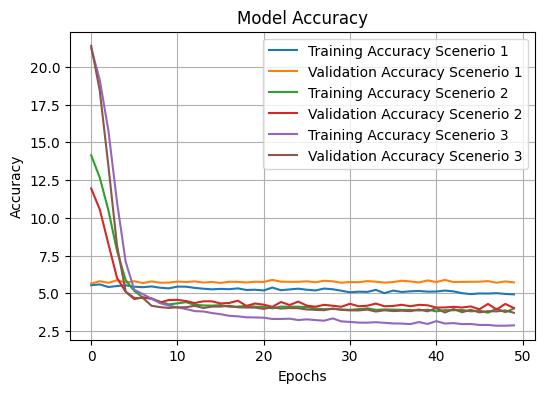

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(history1.history['mae'], label='Training Accuracy Scenerio 1')
plt.plot(history1.history['val_mae'], label='Validation Accuracy Scenerio 1')
plt.plot(history5.history['mae'], label='Training Accuracy Scenerio 2')
plt.plot(history5.history['val_mae'], label='Validation Accuracy Scenerio 2')
plt.plot(history6.history['mae'], label='Training Accuracy Scenerio 3')
plt.plot(history6.history['val_mae'], label='Validation Accuracy Scenerio 3')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()